# Determine K Means

## Introduction: 


Determine K number of clusters using K Means. The wine_fraud dataset is comprised of various data on wine attributes with 3 different cultivars

### Import Data Set and EDA 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('/Users/elizabethdombowsky/Desktop/MSDS 650 Analytics/week 6/wine_fraud.csv')

In [37]:
df

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


When looking at the dataset and the key, the numbers are off. To determine the correct variable for the first column, will look at the unique values. If the unique values range from 1,2,3 then the first column is Class

In [3]:
df['v0'].unique()

array([1, 2, 3])

First column is class. From here, rename dataset for readability according to the key provided to the dataset

In [40]:
df= df.rename(columns = {'v0':'Class', 
                          'v1':'Alcohol',
                          'v2':'Malic_Acid',
                          'v3':'Ash',
                          'v4':'Alcalinity_of_ash',
                          'v5':'Magnesium', 
                          'v6':'Total_Phenols', 
                          'v7':'Flavinoids', 
                          'v8':'Nonflavanoid_Phenols', 
                          'v9':'Proanthocyanins', 
                          'v10':'Color_Intensity',
                          'v11':'Hue', 
                          'v12':'OD280/OD315_dilted_wines',
                          'v13':'Proline'})

## EDA

Clean up the data set for opitmal preformance in the K-Means Algorithm

### Look at missing values 

In [5]:
df.isna().sum()

Class                       0
Alcohol                     0
Malic_Acid                  0
Ash                         0
Alcalinity_of_ash           0
Magnesium                   0
Total_Phenols               0
Flavinoids                  0
Nonflavanoid_Phenols        0
Proanthocyanins             0
Color_Intensity             0
Hue                         0
OD280/OD315_dilted_wines    0
Proline                     0
dtype: int64

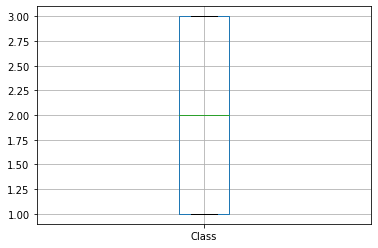

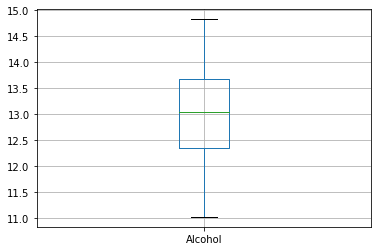

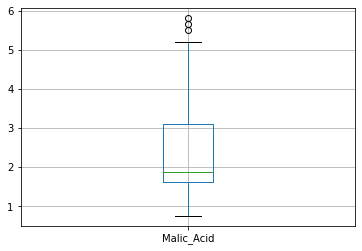

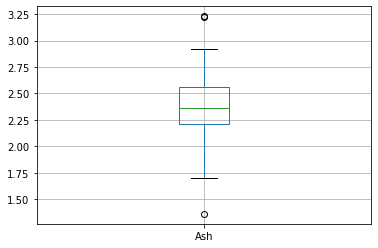

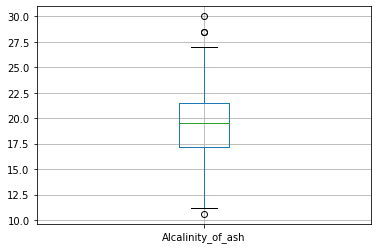

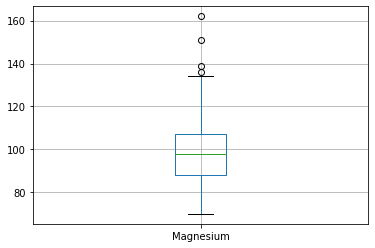

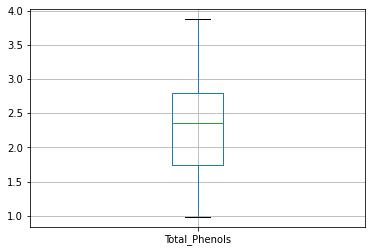

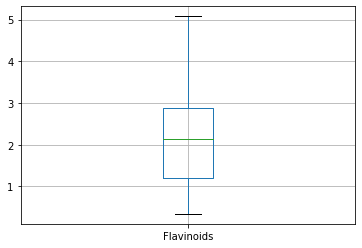

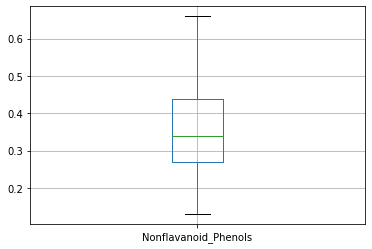

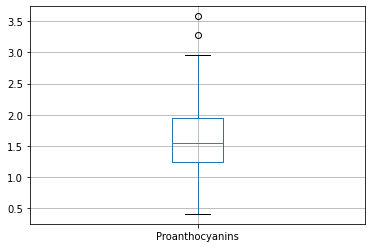

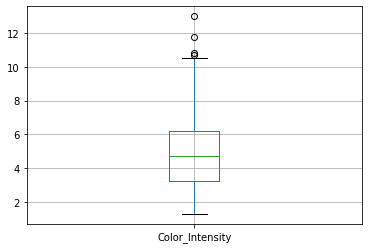

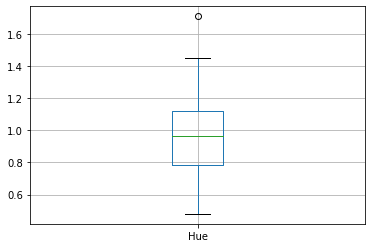

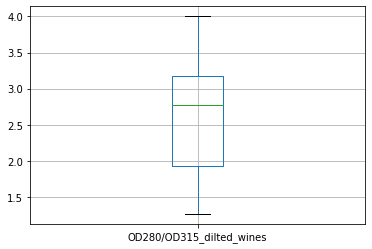

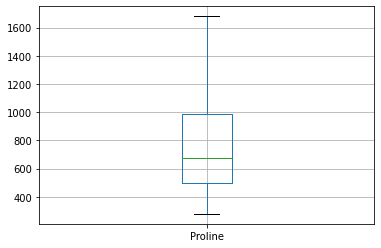

In [6]:
#Plot each column in boxplot
for column in df:
    plt.figure()
    df.boxplot([column])

Columns Ash, Alcalinity_of_ash, Magnesium, Proanthocyanins, Color_Intensity, Malic_Acid, and Hue all have outliers. For the purpose of wanting to classify these, they will all be deleted. Not deleting these could cause issues with the algorithm. 

### Delete Outliers in Each Column

In [46]:
#Ash
df = df[ (df['Ash']>= 1.79)&(df['Ash'] <=3.0)]
#Alcalinity_of_ash
df = df[ (df['Alcalinity_of_ash']>= 12)&(df['Alcalinity_of_ash'] <=26.5)]
#Proanthocyanins
df = df[ (df['Proanthocyanins']<=2.9)]
#Magnesium
df = df[ (df['Magnesium'] <=133)]
#Color_Intensity
df = df[ (df['Color_Intensity'] <10)]
#Hue
df = df[ (df['Hue'] <1.6)]
#Malic Acid
df = df[ (df['Malic_Acid'] <= 5.1)]

### Check Again for Outliers to make sure all were deleted

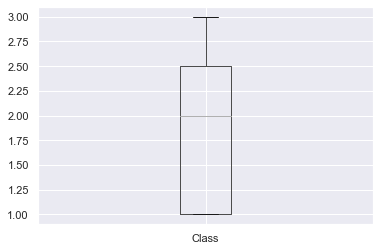

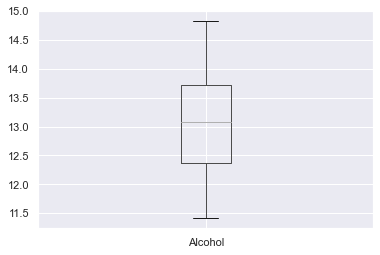

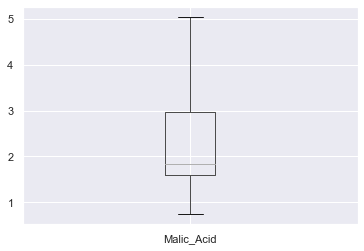

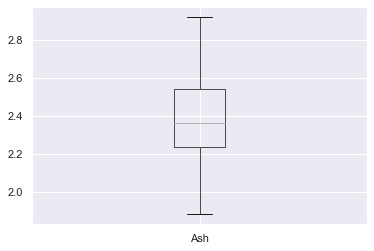

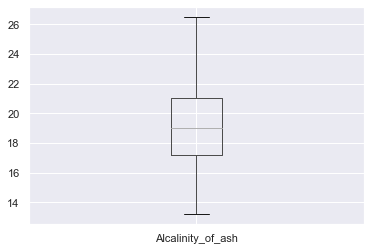

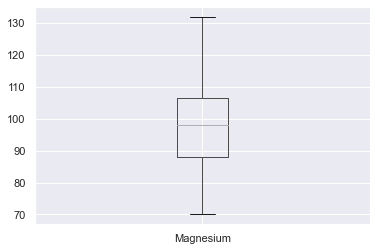

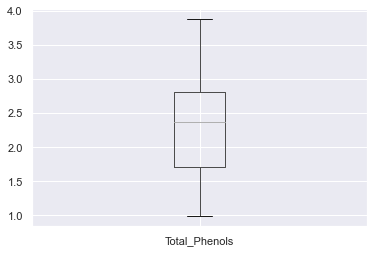

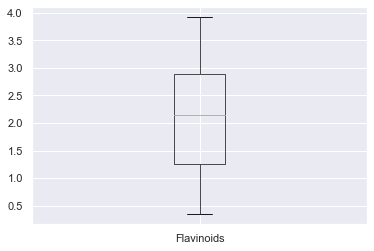

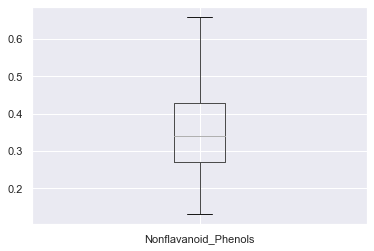

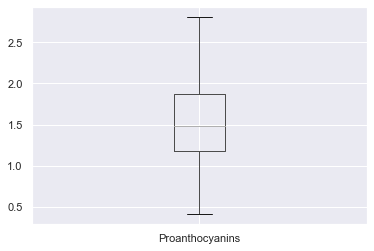

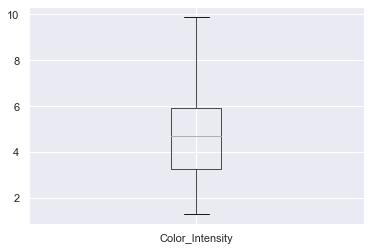

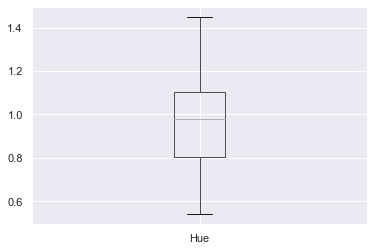

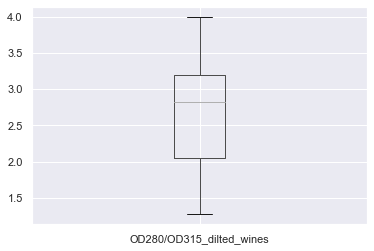

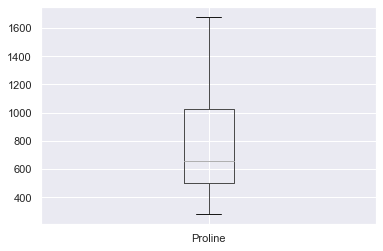

In [47]:
for column in df:
    plt.figure()
    df.boxplot([column])

### Look at datatypes in the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Class                     148 non-null    int64  
 1   Alcohol                   148 non-null    float64
 2   Malic_Acid                148 non-null    float64
 3   Ash                       148 non-null    float64
 4   Alcalinity_of_ash         148 non-null    float64
 5   Magnesium                 148 non-null    int64  
 6   Total_Phenols             148 non-null    float64
 7   Flavinoids                148 non-null    float64
 8   Nonflavanoid_Phenols      148 non-null    float64
 9   Proanthocyanins           148 non-null    float64
 10  Color_Intensity           148 non-null    float64
 11  Hue                       148 non-null    float64
 12  OD280/OD315_dilted_wines  148 non-null    float64
 13  Proline                   148 non-null    int64  
dtypes: float64

All columns are float or integer, will make integer columns a float to prevent any possible issues later on with the alogrithm

### Change dtype integer to float 

In [42]:
#Class
df['Class'] = df['Class'].astype(float)
#Magenesium
df["Magnesium"] = df["Magnesium"].astype(float)
#Proline
df['Proline'] = df['Proline'].astype(float)

### Check to confirm the change

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Class                     148 non-null    float64
 1   Alcohol                   148 non-null    float64
 2   Malic_Acid                148 non-null    float64
 3   Ash                       148 non-null    float64
 4   Alcalinity_of_ash         148 non-null    float64
 5   Magnesium                 148 non-null    float64
 6   Total_Phenols             148 non-null    float64
 7   Flavinoids                148 non-null    float64
 8   Nonflavanoid_Phenols      148 non-null    float64
 9   Proanthocyanins           148 non-null    float64
 10  Color_Intensity           148 non-null    float64
 11  Hue                       148 non-null    float64
 12  OD280/OD315_dilted_wines  148 non-null    float64
 13  Proline                   148 non-null    float64
dtypes: float64

# Normalization

The data set should be normalized as a few of the columns are on drastically different scales. Column Proline has vlaues in the thousands and Malic_Acid stays under 10. Because of this, the data needs to be normalized so one of the features in the algorthim doesn't get more influence or less influence in the model. 

In [14]:
from sklearn import preprocessing
d = preprocessing.normalize(df)
scaled_df = pd.DataFrame(d, columns= df.columns)
scaled_df.head()

,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_Phenols,Flavinoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_dilted_wines,Proline
0,0.000932,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.000841,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175
2,0.000674,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
3,0.001343,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752
4,0.000688,0.009763,0.001210,0.001684,0.010450,0.077002,0.002248,0.002331,0.000234,0.001354,0.004641,0.000722,0.001959,0.996907


This looks a lot better. The columsn now are on a range of 1 rather than some from 1-5 and some from 500-1000. This will help in the clustering process

# KMeans Clustering

In [15]:
%matplotlib inline
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

### Split into Groups

In [18]:
# split data into features (X) and labels (y)
X = df.iloc[:,0:9]
y = df.iloc[:,-1]

### Use sum of squares to find the optimal number of clusters

In [20]:
# Using within sum of squares to determine the optimal number of clusters for the final model. 

from sklearn.cluster import KMeans
 
sum_sq= []

for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    sum_sq.append(-model.score(X))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


### Plot the results of the above calculation

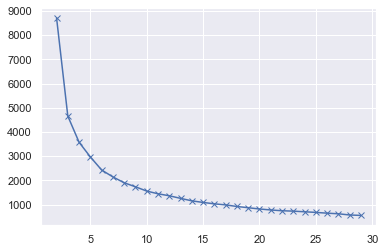

In [22]:
plt.plot(range(2, 30), sum_sq, 'bx-')

The model change starts to slow down around 6 or 7 clusters which would make optimal clusters this size. Will look at another plot to confirm this number

### np-diff Plot

Look at np-diff plot to see any change between this plot and the scree plot above

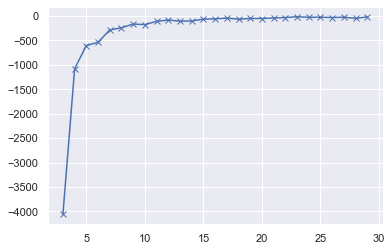

In [25]:
plt.plot(range(3,30), np.diff(sum_sq), 'bx-')

The np.diff plot plots the differences between cluster values. The first flat spot in the graph is around 5-6 clusters. Due to both of these graphs, I will start with clusters set at k = 5

### Look at predictions with number of clusters at 5

In [43]:
model = KMeans(n_clusters=5, random_state=42, n_jobs=-1)
model.fit(X)

preds= model.predict(X)

### Silhoutte Scores

In [28]:
from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.3719110633844028

A value of .37 is quite low indicating the samples might have been assigned to the wrong cluster. The goal is to have close to a number 1. Some clusters are ok and some are not. 

### Visualize the Clusters

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

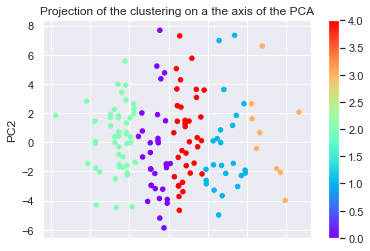

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

You can see the custers well here, however, the clusters are spread out quite a bit and don't really have clear shape. Will try to use the silhouette scores to determine clusters and see if that improves the model any.

### Silhouette Scores to Determine Clusters

In [30]:
for n in range (2,30):
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)

    preds= model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.5057856501612993
Silhouette score for  3  clusters:  0.48519515559650533
Silhouette score for  4  clusters:  0.41677889829793013
Silhouette score for  5  clusters:  0.3719110633844028
Silhouette score for  6  clusters:  0.36589779023376745
Silhouette score for  7  clusters:  0.35861328669803905
Silhouette score for  8  clusters:  0.3640757199950319
Silhouette score for  9  clusters:  0.30102728941516005
Silhouette score for  10  clusters:  0.3077976701319796
Silhouette score for  11  clusters:  0.3036758301992998
Silhouette score for  12  clusters:  0.3013209420010429
Silhouette score for  13  clusters:  0.2991040719289511
Silhouette score for  14  clusters:  0.3012437424226926
Silhouette score for  15  clusters:  0.29160783232602816
Silhouette score for  16  clusters:  0.28760448647993925
Silhouette score for  17  clusters:  0.28270722225226613
Silhouette score for  18  clusters:  0.283686279202837
Silhouette score for  19  clusters:  0.2856461419

Two clusters by far preformed the best at .506 in comparison to .37 which was my chosen number of clusters based on scree and np-diff plots. 

### Visualize the Plot based on the Silhouette Scores

In [32]:
model = KMeans(n_clusters=2, random_state=42, n_jobs=-1)
model.fit(X)

preds= model.predict(X)

from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.5057856501612993

### Create PCA Plot Again

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

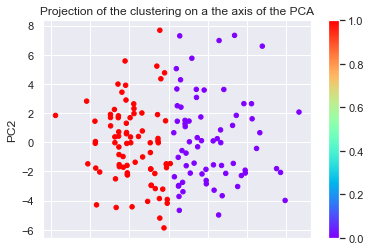

In [33]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

This is much clearer and has a much higher sum of squares and the clustering is clearer.

# Summary

- Using Sum of Squares to determine optimal number of clusters, it came out to be .37 
- Number of clusters based on the scree and np-diff plots determined the clusters to be 5
- After plotting the PCA plot, the number of clusters were unclear see below: 
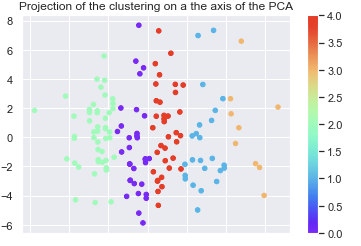

- Using silhouette scores to determine the number of clusters, 2 clusters had the highest preformance at .506 which is twice as high as the sum of squares with 5 clusters
- 2 clusters is the optimal number of clusters for the dataset using K Means